In [1]:
  # Importing dependencies
import torch
from torch import nn

torch.__version__

'2.2.0+cpu'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print("Already exists so skipping downloading")
else:
  print("Doesnt exist so downloading")
  image_path.mkdir(parents=True,
                   exist_ok=True)

with open(data_path/ "pizza_steak_sushi.zip", 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping")
  zip_ref.extractall(image_path)


Already exists so skipping downloading
Unzipping


In [4]:
import os
def walk_through_dir(dir_path):
  for dirpath, dir_names, filenames in os.walk(dir_path):
    print(f"THERE ARE {len(dir_names)} DIRECTORIES AND {len(filenames)} IMAGES IN '{dirpath} .")

In [5]:
walk_through_dir(image_path)

THERE ARE 2 DIRECTORIES AND 0 IMAGES IN 'data\pizza_steak_sushi .
THERE ARE 3 DIRECTORIES AND 0 IMAGES IN 'data\pizza_steak_sushi\test .
THERE ARE 0 DIRECTORIES AND 25 IMAGES IN 'data\pizza_steak_sushi\test\pizza .
THERE ARE 0 DIRECTORIES AND 19 IMAGES IN 'data\pizza_steak_sushi\test\steak .
THERE ARE 0 DIRECTORIES AND 31 IMAGES IN 'data\pizza_steak_sushi\test\sushi .
THERE ARE 3 DIRECTORIES AND 0 IMAGES IN 'data\pizza_steak_sushi\train .
THERE ARE 0 DIRECTORIES AND 78 IMAGES IN 'data\pizza_steak_sushi\train\pizza .
THERE ARE 0 DIRECTORIES AND 75 IMAGES IN 'data\pizza_steak_sushi\train\steak .
THERE ARE 0 DIRECTORIES AND 72 IMAGES IN 'data\pizza_steak_sushi\train\sushi .


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir


(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [7]:
image_path

WindowsPath('data/pizza_steak_sushi')

Image path :data\pizza_steak_sushi\train\pizza\1089334.jpg
Image class : pizza
Image height : 288
Image width : 512


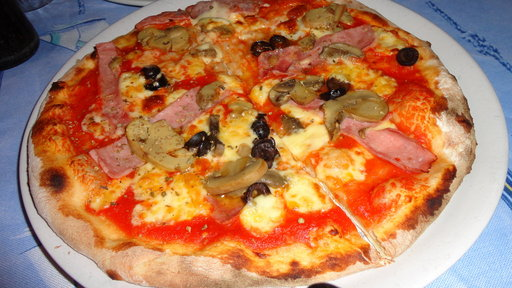

In [8]:
import random
from PIL import Image
#random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)


image_class =random_image_path.parent.stem
 
img = Image.open(random_image_path)

print(f"Image path :{random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height : {img.height}")
print(f"Image width : {img.width}")
img

In [9]:
random_image_path = random.choice(image_path_list)
random_image_path

image_class =random_image_path.parent.stem
image_class
img = Image.open(random_image_path)


(-0.5, 511.5, 511.5, -0.5)

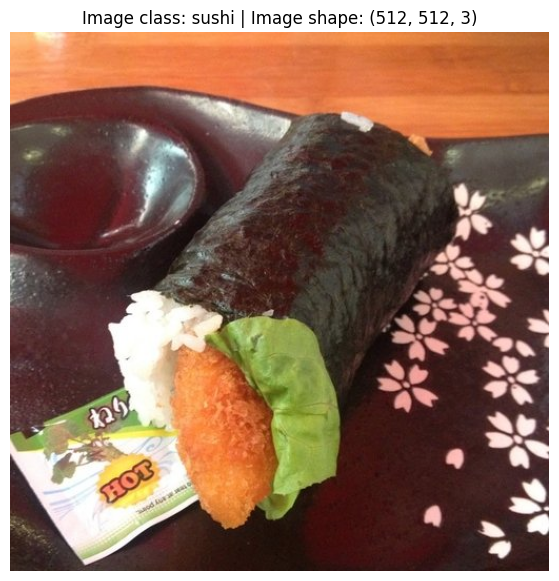

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#turning img to array
img_array = np.asarray(img)

#plotting the img
plt.figure(figsize = (10,7))
plt.imshow(img_array)
plt.title(f"Image class: {image_class} | Image shape: {img_array.shape}")
plt.axis(False)

#### Transforming the data

1. Turn the image into tensor
2. Turn it into Dataset and subsequently into Dataloader object

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

c:\Users\arulk\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [12]:
#transforming the data using torchvision.transforms
data_transform = transforms.Compose(
  [
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
  ]
)

In [13]:
data_transform(img)

tensor([[[0.7020, 0.7098, 0.7137,  ..., 0.9882, 0.9961, 0.9961],
         [0.6902, 0.7020, 0.7059,  ..., 0.9922, 0.9922, 0.9922],
         [0.6667, 0.6745, 0.6745,  ..., 0.9804, 0.9804, 0.9843],
         ...,
         [0.2039, 0.2039, 0.2118,  ..., 0.2235, 0.2039, 0.2118],
         [0.1804, 0.1804, 0.1961,  ..., 0.2000, 0.1961, 0.2039],
         [0.1843, 0.1882, 0.1922,  ..., 0.1961, 0.2000, 0.2157]],

        [[0.3882, 0.3961, 0.4078,  ..., 0.7490, 0.7294, 0.7294],
         [0.3725, 0.3804, 0.3882,  ..., 0.6863, 0.6980, 0.7020],
         [0.3490, 0.3569, 0.3569,  ..., 0.6275, 0.6431, 0.6549],
         ...,
         [0.1137, 0.1216, 0.1255,  ..., 0.1490, 0.1373, 0.1373],
         [0.1020, 0.1020, 0.1098,  ..., 0.1412, 0.1412, 0.1373],
         [0.0980, 0.1020, 0.0980,  ..., 0.1412, 0.1451, 0.1490]],

        [[0.1765, 0.1961, 0.2000,  ..., 0.4941, 0.4784, 0.4824],
         [0.1725, 0.1882, 0.1922,  ..., 0.4392, 0.4471, 0.4510],
         [0.1529, 0.1686, 0.1725,  ..., 0.3843, 0.3961, 0.

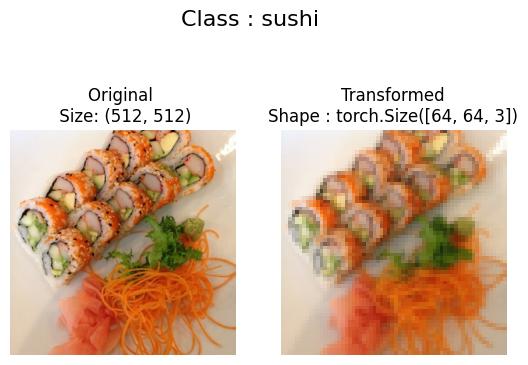

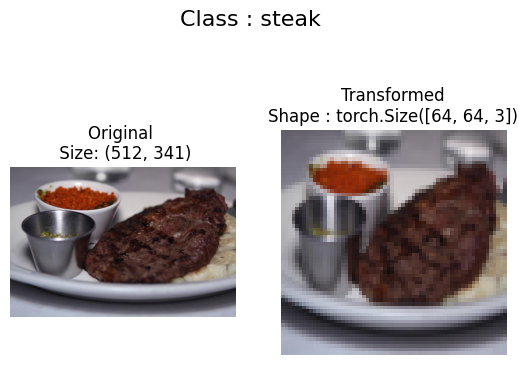

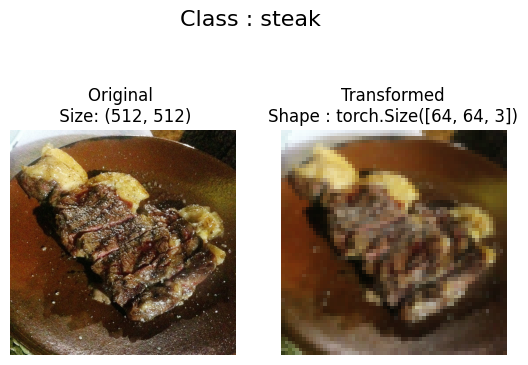

In [14]:
def plot_transformed_images(image_path: list, transform, n =3, seed = None):
  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_path, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1,  ncols =2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \n Size: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape : {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class : {image_path.parent.stem}", fontsize  = 16)

plot_transformed_images(image_path_list, data_transform, 3        )

  

In [15]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root = test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
#getting class names as list
class_names  = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
#class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
print("hello world0.014")

hello world0.014


### Turning images into dataloader

In [21]:
import os
os.cpu_count()

16

In [38]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_data_loader = DataLoader(dataset = train_data,
                               batch_size = BATCH_SIZE,
                               num_workers = 1,
                               shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False )
train_data_loader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2820faffe80>,
 <torch.utils.data.dataloader.DataLoader at 0x2820fafec50>)

In [39]:
len(train_data_loader), len(test_dataloader)

(225, 75)

In [40]:
len(train_data), len(test_data)

(225, 75)

In [41]:
img, label = next(iter(train_data_loader))

print(f"Image shape : {img.shape}")
print(f"Label shape : {label.shape}")

Image shape : torch.Size([1, 3, 64, 64])
Label shape : torch.Size([1])
